# Beijing Air Quality Forecasting Starter Notebook

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LayerNormalization
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Mount Google Drive to access datasets
#from google.colab import drive
#drive.mount('/content/drive')


In [ ]:
# Load the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


# Explore the training data

In this sections explore your dataset with appropiate statistics and visualisations to understand your better. Ensure that you explain output of every code cell and what it entails.

In [ ]:
# Inspecting the first few rows of the dataset to understand its structure.
print("Training Data Overview:")
train.head(10)

Training Data Overview:


,No,DEWP,TEMP,PRES,Iws,Is,Ir,datetime,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
0,1,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,2010-01-01 00:00:00,1.448138,-0.732019,-0.522096,NaN
1,2,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,2010-01-01 01:00:00,1.448138,-0.732019,-0.522096,NaN
2,3,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,2010-01-01 02:00:00,1.448138,-0.732019,-0.522096,NaN
3,4,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,2010-01-01 03:00:00,1.448138,-0.732019,-0.522096,NaN
4,5,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,2010-01-01 04:00:00,1.448138,-0.732019,-0.522096,NaN
5,6,-1.442309,-1.840273,0.053790,-0.155751,-0.069353,-0.137667,2010-01-01 05:00:00,1.448138,-0.732019,-0.522096,NaN
6,7,-1.442309,-1.758296,0.053790,-0.093164,-0.069353,-0.137667,2010-01-01 06:00:00,1.448138,-0.732019,-0.522096,NaN
7,8,-1.442309,-1.758296,0.053790,-0.057371,-0.069353,-0.137667,2010-01-01 07:00:00,1.448138,-0.732019,-0.522096,NaN
8,9,-1.442309,-1.758296,0.053790,0.005216,-0.069353,-0.137667,2010-01-01 08:00:00,1.448138,-0.732019,-0.522096,NaN
9,10,-1.511594,-1.676318,0.053790,0.067804,-0.069353,-0.137667,2010-01-01 09:00:00,1.448138,-0.732019,-0.522096,NaN


In [ ]:
print(train.isnull().sum())
print(train.shape)

No             0
DEWP           0
TEMP           0
PRES           0
Iws            0
Is             0
Ir             0
datetime       0
cbwd_NW        0
cbwd_SE        0
cbwd_cv        0
pm2.5       1921
dtype: int64
(30676, 12)


In [ ]:
test.head(10)

,No,DEWP,TEMP,PRES,Iws,Is,Ir,datetime,cbwd_NW,cbwd_SE,cbwd_cv
0,30677,1.190496,0.701029,-2.186052,-0.003982,-0.069353,-0.137667,2013-07-02 04:00:00,1.448138,-0.732019,-0.522096
1,30678,1.121211,0.619051,-2.186052,0.031811,-0.069353,-0.137667,2013-07-02 05:00:00,1.448138,-0.732019,-0.522096
2,30679,1.190496,0.783006,-2.186052,0.094398,-0.069353,-0.137667,2013-07-02 06:00:00,1.448138,-0.732019,-0.522096
3,30680,1.190496,0.946961,-2.088668,0.174782,-0.069353,-0.137667,2013-07-02 07:00:00,1.448138,-0.732019,-0.522096
4,30681,1.190496,1.192893,-1.991283,0.210575,-0.069353,-0.137667,2013-07-02 08:00:00,1.448138,-0.732019,-0.522096
5,30682,1.190496,1.274871,-1.991283,0.273162,-0.069353,-0.137667,2013-07-02 09:00:00,1.448138,-0.732019,-0.522096
6,30683,1.051927,1.356848,-1.991283,0.389339,-0.069353,-0.137667,2013-07-02 10:00:00,1.448138,-0.732019,-0.522096
7,30684,1.051927,1.520803,-1.991283,0.487719,-0.069353,-0.137667,2013-07-02 11:00:00,1.448138,-0.732019,-0.522096
8,30685,0.913358,1.602781,-1.991283,0.630690,-0.069353,-0.137667,2013-07-02 12:00:00,1.448138,-0.732019,-0.522096
9,30686,0.913358,1.766736,-1.991283,0.773661,-0.069353,-0.137667,2013-07-02 13:00:00,1.448138,-0.732019,-0.522096


In [ ]:
train.columns

Index(['No', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'datetime', 'cbwd_NW',
       'cbwd_SE', 'cbwd_cv', 'pm2.5'],
      dtype='object')

In [ ]:
print(test.isnull().sum())
print(test.shape)

No          0
DEWP        0
TEMP        0
PRES        0
Iws         0
Is          0
Ir          0
datetime    0
cbwd_NW     0
cbwd_SE     0
cbwd_cv     0
dtype: int64
(13148, 11)


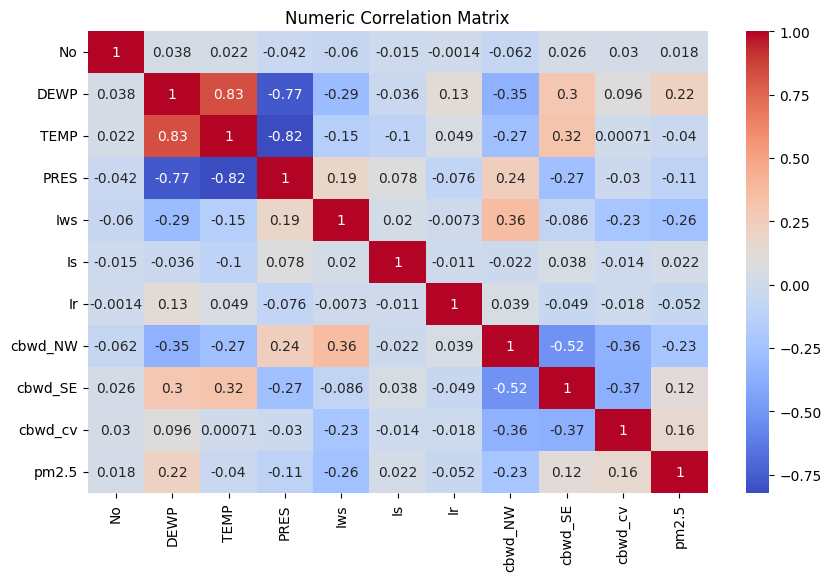

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(train.drop('datetime', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Numeric Correlation Matrix')
plt.show()

In [ ]:
# Ensure 'datetime' column is in datetime format
train['datetime'] = pd.to_datetime(train['datetime'])

test['datetime'] = pd.to_datetime(test['datetime'])

# Set the 'datetime' column as the index for better time-series handling
train.set_index('datetime', inplace=True)
# val.set_index('datetime', inplace=True)
test.set_index('datetime', inplace=True)


# Handle missing values


- Check the dataset for missing values and decide how to handle them.
- In this example, missing values are filled with the mean. You can experiment with other strategies.

# Separate features and target

- Feel free to trop any non-essential columns like that you think might not contribute to modeling.

<Axes: xlabel='datetime'>

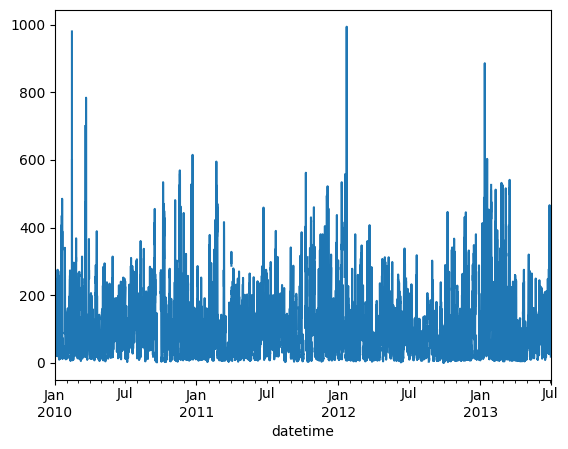

In [ ]:
pm = train['pm2.5']
pm.plot()

In [ ]:
X_train = train.drop(['pm2.5', 'No'], axis=1)
y_train = train['pm2.5']

In [ ]:
def df_to_X_y(df, window_size=5):
    target_np = df['pm2.5'].to_numpy()
    # Drop the 'pm2.5' and 'No' columns to create the features array
    features_df = df.drop(['pm2.5', 'No'], axis=1)
    features_np = features_df.to_numpy()

    X = []
    y = []
    # Iterate through the data to create windows
    for i in range(len(features_np) - window_size):
        row = features_np[i : i + window_size]
        X.append(row)
        label = target_np[i + window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [ ]:
def create_test_sequences(df, window_size=24):
    features = df.drop(['No'], axis=1).to_numpy()
    X_test = []
    for i in range(len(features) - window_size):
        X_test.append(features[i:i+window_size])
    return np.array(X_test)

In [ ]:
# Handle nulls with interpolation
train = train.interpolate(method='linear')

# Create sequences using df_to_X_y
WINDOW_SIZE = 30
X_train, y_train = df_to_X_y(train, WINDOW_SIZE)




In [ ]:
# Apply RobustScaler after sequence creation
from sklearn.preprocessing import RobustScaler

x_scaler = RobustScaler()
X_train_scaled = x_scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)

y_scaler = RobustScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))

In [ ]:
WINDOW_SIZE = 24
X_train, y_train = df_to_X_y(train, WINDOW_SIZE)
X_train.shape, y_train.shape

((30652, 24, 9), (30652,))

# Build model

Below is a simple LSTM model. Your task is to experiment with different parameters like, numbers of layers, units, activation functions, and optimizers, etc to get the best performing model. Experiment with other optimizers (e.g., SGD) or hyperparameters to improve performance.

In [ ]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LayerNormalization(),
    Dropout(0.2),

    LSTM(64, return_sequences=False),
    LayerNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 24, 128)        │        70,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_2           │ (None, 24, 128)        │           256 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_3           │ (None, 64)             │           128 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,721 (495.00 KB)

 Trainable params: 126,721 (495.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

In [ ]:
# Compile the model
adam_optimizer = Adam(learning_rate=0.005)
model.compile(
    optimizer=adam_optimizer,
    loss='mse',
    metrics=[rmse]
    )

In [ ]:
early_stop = EarlyStopping(patience=4, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=30,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/30
479/479 ━━━━━━━━━━━━━━━━━━━━ 49s 89ms/step - loss: 0.5088 - rmse: 0.6829
Epoch 2/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,rmse
  current = self.get_monitor_value(logs)


479/479 ━━━━━━━━━━━━━━━━━━━━ 84s 94ms/step - loss: 0.3474 - rmse: 0.5768
Epoch 3/30
479/479 ━━━━━━━━━━━━━━━━━━━━ 80s 91ms/step - loss: 0.2943 - rmse: 0.5335
Epoch 4/30
479/479 ━━━━━━━━━━━━━━━━━━━━ 45s 95ms/step - loss: 0.2737 - rmse: 0.5138
Epoch 5/30
479/479 ━━━━━━━━━━━━━━━━━━━━ 81s 93ms/step - loss: 0.2564 - rmse: 0.4958
Epoch 6/30
479/479 ━━━━━━━━━━━━━━━━━━━━ 82s 94ms/step - loss: 0.2339 - rmse: 0.4733
Epoch 7/30
479/479 ━━━━━━━━━━━━━━━━━━━━ 81s 93ms/step - loss: 0.2066 - rmse: 0.4472
Epoch 8/30
479/479 ━━━━━━━━━━━━━━━━━━━━ 48s 100ms/step - loss: 0.1967 - rmse: 0.4354
Epoch 9/30
479/479 ━━━━━━━━━━━━━━━━━━━━ 77s 89ms/step - loss: 0.1641 - rmse: 0.3982
Epoch 10/30
479/479 ━━━━━━━━━━━━━━━━━━━━ 84s 94ms/step - loss: 0.1564 - rmse: 0.3871
Epoch 11/30
479/479 ━━━━━━━━━━━━━━━━━━━━ 80s 91ms/step - loss: 0.1359 - rmse: 0.3592
Epoch 12/30
479/479 ━━━━━━━━━━━━━━━━━━━━ 84s 95ms/step - loss: 0.1129 - rmse: 0.3295
Epoch 13/30
479/479 ━━━━━━━━━━━━━━━━━━━━ 47s 99ms/step - loss: 0.1289 - rmse: 0.352

In [ ]:
y_pred_scaled = model.predict(X_train_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_true = y_scaler.inverse_transform(y_train_scaled)

958/958 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step


958/958 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step


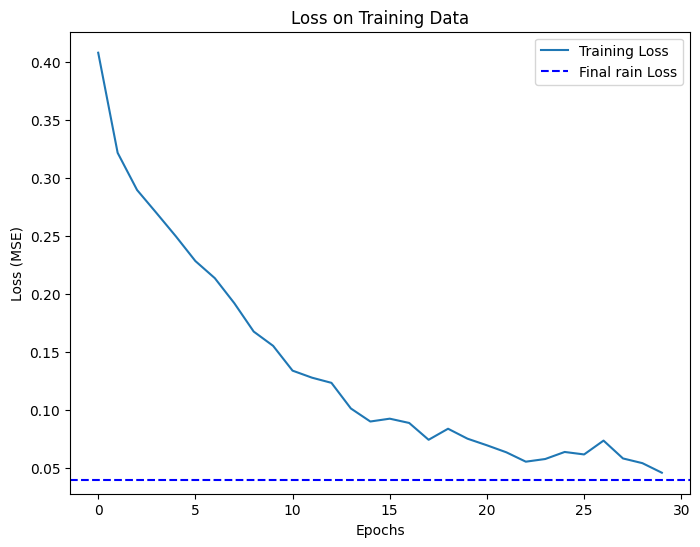

Final Training Loss (MSE): 0.03942024715568005


In [ ]:
# Calculate training loss
train_predictions_scaled = model.predict(X_train_scaled)
train_loss = np.mean((y_train_scaled.flatten() - train_predictions_scaled.flatten())**2)

# Plot training loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')  # Training loss during epochs
plt.axhline(y=train_loss, color='blue', linestyle='--', label='Final rain Loss')  # Final training loss
plt.title('Loss on Training Data')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

print(f"Final Training Loss (MSE): {train_loss}")

In [ ]:
print(test.columns.tolist())


['No', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv']


In [ ]:
from scipy import stats
import pandas as pd

X_test_df = test.drop(['No'], axis=1) # Drop 'No' to match training features


X_test_df = X_test_df.interpolate(method='linear')


X_test_scaled_flat = x_scaler.transform(X_test_df.values)


def create_sequences(data, window_size):
    """
    Creates sequences of data for time series modeling.

    Args:
        data (np.ndarray): The 2D array of features.
        window_size (int): The number of time steps in each sequence.

    Returns:
        np.ndarray: The 3D array of sequences.
    """
    sequences = []
    # Note: The range goes up to len(data) - window_size + 1 to include the last possible sequence
    for i in range(len(data) - window_size + 1):
        sequences.append(data[i:i + window_size])
    return np.array(sequences)

from scipy import stats
import pandas as pd # Ensure pandas is imported
import numpy as np # Ensure numpy is imported

# Corrected variable name from X_test_sequences to X_test_seq


X_test_df = test.drop(['No'], axis=1) # Drop 'No' to match training features

# Handle nulls with interpolation if any are present in the test data
# While the traceback doesn't indicate nulls, it's good practice
X_test_df = X_test_df.interpolate(method='linear')


X_test_scaled_flat = x_scaler.transform(X_test_df.values)


def create_sequences(data, window_size):
    """
    Creates sequences of data for time series modeling.

    Args:
        data (np.ndarray): The 2D array of features.
        window_size (int): The number of time steps in each sequence.

    Returns:
        np.ndarray: The 3D array of sequences.
    """
    sequences = []
    # Note: The range goes up to len(data) - window_size + 1 to include the last possible sequence
    for i in range(len(data) - window_size + 1):
        sequences.append(data[i:i + window_size])
    return np.array(sequences)


# Now apply the function to the scaled 2D test data
X_test_seq = create_sequences(X_test_scaled_flat, window_size=WINDOW_SIZE)
y_test_pred = model.predict(X_test_seq)

# Corrected variable name from pm25_scaler to y_scaler
y_test_pred_rescaled = y_scaler.inverse_transform(y_test_pred)
num_points_for_extrapolation_fit = min(5, len(y_test_pred_rescaled)) # Ensure we don't exceed available predictions
x = np.arange(num_points_for_extrapolation_fit)
y = y_test_pred_rescaled[:num_points_for_extrapolation_fit].flatten()

# Handle the case where there are not enough predicted values for extrapolation (e.g., very small test set or large window)
if num_points_for_extrapolation_fit > 1:
    slope, intercept, _, _, _ = stats.linregress(x, y)
    # Extrapolate backwards for the first WINDOW_SIZE-1 timestamps
    extrapolated = (intercept - slope * np.arange(WINDOW_SIZE - 1, 0, -1))
else:
    # If not enough points for regression, just use the first predicted value for extrapolation
    extrapolated = np.full(WINDOW_SIZE - 1, y[0] if len(y) > 0 else 0)



final_predictions = np.concatenate([extrapolated, y_test_pred_rescaled.flatten()])

# Get timestamps from the original test DataFrame
# Corrected variable name from test_df to test
timestamps = test.index


expected_len = len(test)
assert len(final_predictions) == expected_len, f"Expected {expected_len}, got {len(final_predictions)}. Check window size and extrapolation logic."

# Create submission DataFrame
submission_df = pd.DataFrame({
    # Use the original test index for row IDs
    'row ID': timestamps,
    'pm2.5': final_predictions
})


submission_df['row ID'] = submission_df['row ID'].dt.strftime('%Y-%m-%d %H:%M:%S').str.replace(' 0', ' ', regex=False)


# Convert pm2.5 to integer and handle potential negative predictions from extrapolation
submission_df['pm2.5'] = submission_df['pm2.5'].apply(lambda x: max(0, round(x))).astype(int)


# Save
submission_df.to_csv('submission.csv', index=False)
print(f"Saved {submission_df.shape[0]} rows to submission.csv")
y_test_pred_rescaled = y_scaler.inverse_transform(y_test_pred)
num_points_for_extrapolation_fit = min(5, len(y_test_pred_rescaled)) # Ensure we don't exceed available predictions
x = np.arange(num_points_for_extrapolation_fit)
y = y_test_pred_rescaled[:num_points_for_extrapolation_fit].flatten()

# Handle the case where there are not enough predicted values for extrapolation (e.g., very small test set or large window)
if num_points_for_extrapolation_fit > 1:
    slope, intercept, _, _, _ = stats.linregress(x, y)
    # Extrapolate backwards for the first WINDOW_SIZE-1 timestamps
    extrapolated = (intercept - slope * np.arange(WINDOW_SIZE - 1, 0, -1))
else:
    # If not enough points for regression, just use the first predicted value for extrapolation
    extrapolated = np.full(WINDOW_SIZE - 1, y[0] if len(y) > 0 else 0)



final_predictions = np.concatenate([extrapolated, y_test_pred_rescaled.flatten()])

# Get timestamps from the original test DataFrame
# Corrected variable name from test_df to test
timestamps = test.index


expected_len = len(test)
assert len(final_predictions) == expected_len, f"Expected {expected_len}, got {len(final_predictions)}. Check window size and extrapolation logic."

# Create submission DataFrame
submission_df = pd.DataFrame({
    # Use the original test index for row IDs
    'row ID': timestamps,
    'pm2.5': final_predictions
})


submission_df['row ID'] = submission_df['row ID'].dt.strftime('%Y-%m-%d %H:%M:%S').str.replace(' 0', ' ', regex=False)


# Convert pm2.5 to integer and handle potential negative predictions from extrapolation
submission_df['pm2.5'] = submission_df['pm2.5'].apply(lambda x: max(0, round(x))).astype(int)


# Save
submission_df.to_csv('submission.csv', index=False)
print(f"Saved {submission_df.shape[0]} rows to submission.csv")

411/411 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step
Saved 13148 rows to submission.csv
Saved 13148 rows to submission.csv


In [ ]:
model.save('pm25_lstm_model.h5')

import joblib
joblib.dump(x_scaler, 'x_scaler.pkl')
joblib.dump(y_scaler, 'y_scaler.pkl')

['y_scaler.pkl']